# Kagle Titanic Machine Learning Challenge

## 1.  Install Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats as st
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

## 2.  Import Data

In [2]:
df_train = pd.read_csv("https://raw.githubusercontent.com/marcosaacavalcanti/FunnyStuff/main/Titanic%20Machine%20Learning%20Challenge/train.csv")
df_test = pd.read_csv("https://raw.githubusercontent.com/marcosaacavalcanti/FunnyStuff/main/Titanic%20Machine%20Learning%20Challenge/test.csv")

## 3.  Metadata

* $\bold{PassengerId}$: This feature indicates the Id of each passenger. 

* $\bold{Survived}$: This feature indicates whether the passenger has survived or not { 0 : Not Survived, 1 : Survived}. Absent in *df_test*.

* $\bold{Pclass}$: Ticket Class {1st : Upper, 2nd : Middle, 3rd : Lower}

* $\bold{Name}$: This feature indicates the name of individual passengers.

* $\bold{Sex}$: This feature indicates the gender of the passengers.

* $\bold{Age}$: this feature indicates the age of individual passengers.

* $\bold{SibSp}$: Number of siblings and spouses aboard. This feature defines family relations in this way: Sibling := [brother, sister, stepbrother, stepsister] and Spouse := [husband, wife].

* $\bold{Parch}$:  Number of parents and children aboard. This feature defines family relations in this way Parent := [mother, father], Child := [daughter,son, stepdaughter, stepson].

* $\bold{Ticket}$: This feature is showing the Ticket Number of each passengers.

* $\bold{Fare}$: The amount paid by the passenger to get the Ticket.

* $\bold{Cabin}$: This feature is indicating the cabin deck & number of individual passengers.

* $\bold{Embarked}$: Embarked implies where the traveler mounted from. There are three possible values for Embark := {Southampton, Cherbourg,Queenstown}.

## 4.  Data Description

#### 4.1  Data type and missing values

In [3]:
print(df_train.info())
df_train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print(df_test.info())
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
None


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


#### 4.2  Statistical analysis on numerical features

In [5]:
df_train.describe(percentiles=[0.25,0.50,0.60,0.65,0.70,0.75,0.80]).T

,count,mean,std,min,25%,50%,60%,65%,70%,75%,80%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,535.0000,579.5,624.0,668.5,713.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,0.0000,1.0,1.0,1.0,1.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0000,3.0,3.0,3.0,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,31.8000,34.0,36.0,38.0,41.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,0.0000,0.0,1.0,1.0,1.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0000,0.0,0.0,0.0,1.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,21.6792,26.0,27.0,31.0,39.6875,512.3292


#### 4.3  Cardinality of categorical features

In [6]:
print("Cardinality of Categorical Features in Training Data is:")
print(df_train.select_dtypes("object").nunique())

Cardinality of Categorical Features in Training Data is:
Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64


## 5.  Exploratory Data Analysis

#### 5.1  Visualizing - Target Data

In [7]:
z = df_train["Survived"].replace({0:"Not-Survived",1:"Survived"})
z = z.value_counts().to_frame()
z

,Survived
Not-Survived,549
Survived,342


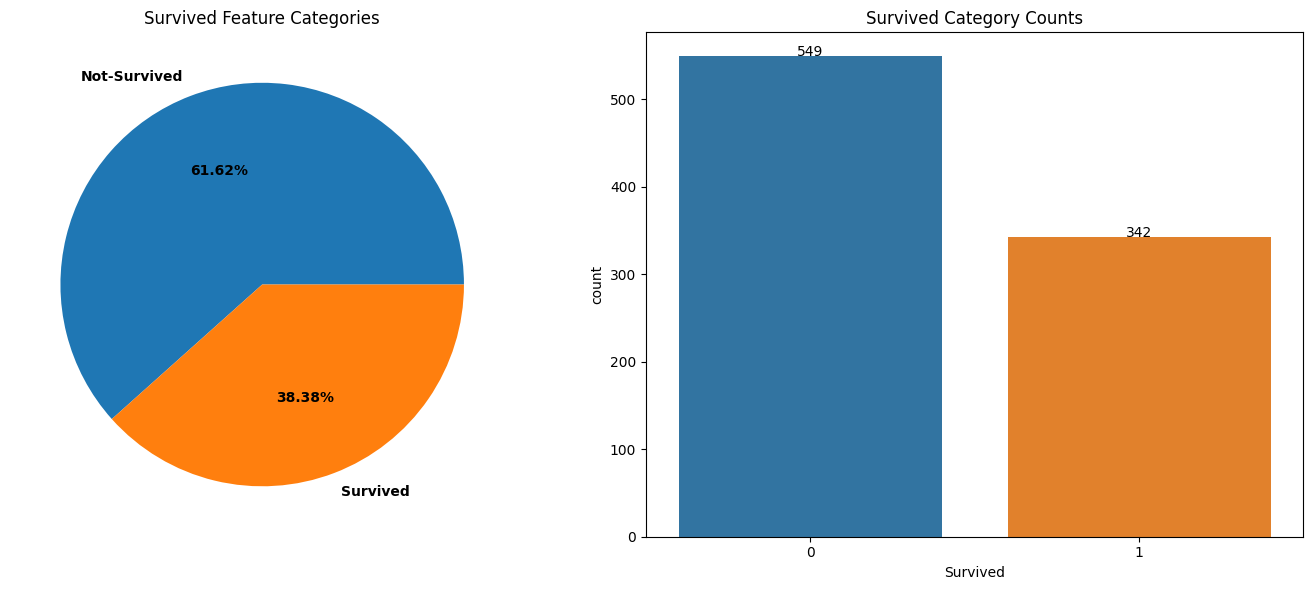

In [8]:
# figure size
plt.figure(figsize=(14,6))

# pie chart
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index,autopct="%0.2f%%",textprops={"fontweight":"black"})
plt.title("Survived Feature Categories")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="Survived",data=df_train)
plt.title("Survived Category Counts")
for i,j in enumerate(z["Survived"]):
    plt.text(i,j,j,ha="center")

# plot
plt.tight_layout()
plt.show()

#### 5.2  Visualizing - Pclass Feature

In [9]:
z = df_train["Pclass"].replace({1:"Upper_Class",2:"Middle_Class",3:"Lower_Class"})
z = pd.concat([z,df_test["Pclass"].replace({1:"Upper_Class",2:"Middle_Class",3:"Lower_Class"})],ignore_index=True)
z = z.value_counts().to_frame()
z

,Pclass
Lower_Class,709
Upper_Class,323
Middle_Class,277


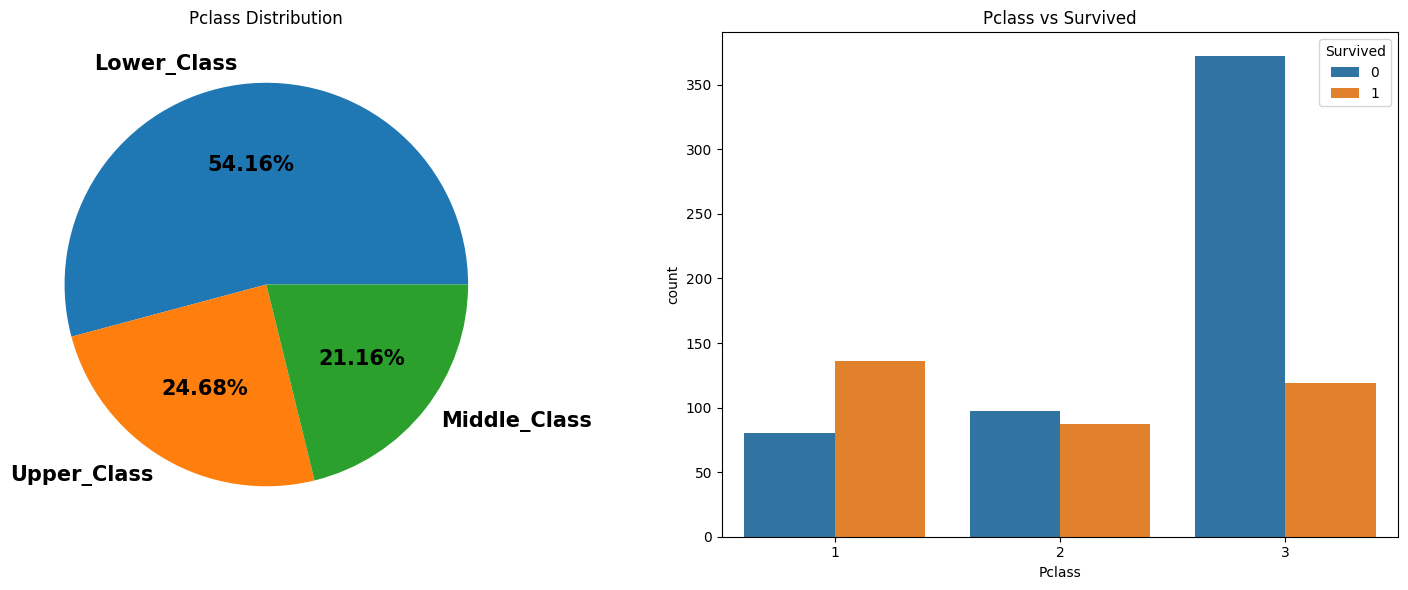

In [10]:
# figure size
plt.figure(figsize=(15,6))

# pie chart
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index.tolist(),autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Pclass Distribution")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="Pclass",hue="Survived",data=df_train)
plt.title("Pclass vs Survived")

# plot
plt.tight_layout()
plt.show()

$\textbf{Observations}$

* From pie chart we can clearly observe that most of the passengers were from Lower class.
* From countplot we can observe the following things:
    * If the passenger is from Lower Class than there is very less chance of Survival.
    * If the passenger is from Middle Class than there is almost equal chance of Survival.
    * If the passengers is from Upper Class than there is High chance of Survival.

#### 5.3  Visualizing - Sex Feature

In [11]:
z = df_train["Sex"].value_counts().to_frame()
z

,Sex
male,577
female,314


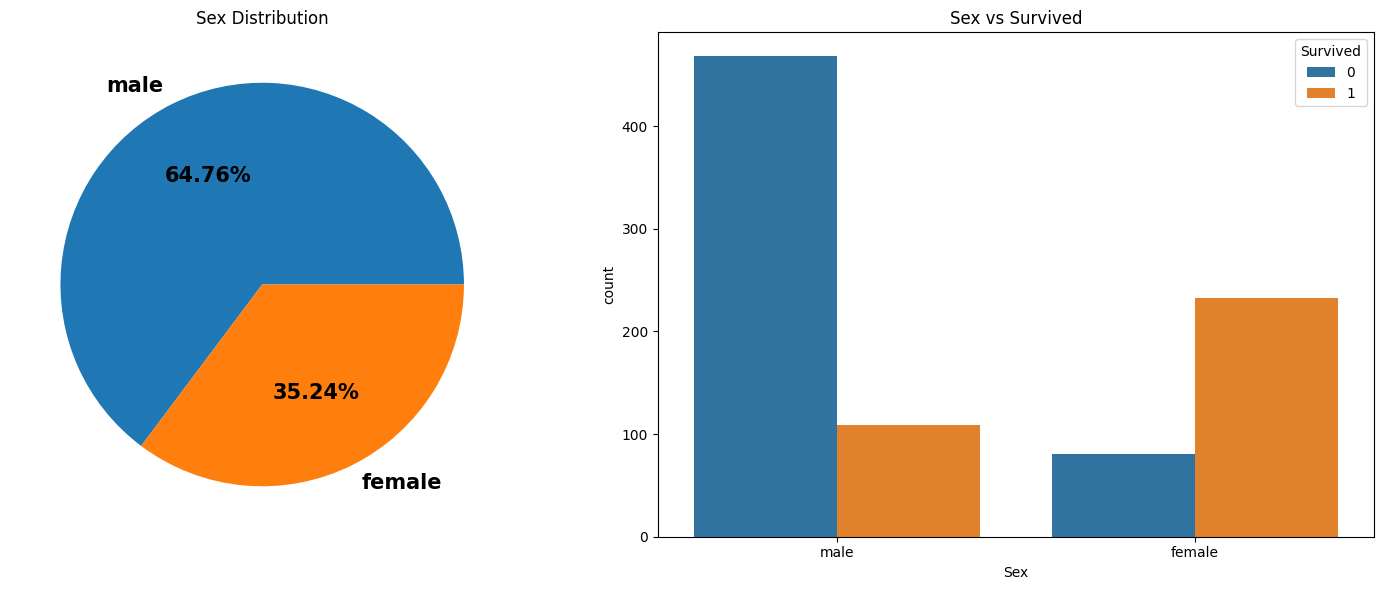

In [12]:
# figure size
plt.figure(figsize=(15,6))

# pie chart
plt.subplot(1,2,1)
plt.pie(z.values.ravel(),labels=z.index.tolist(),autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Sex Distribution")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="Sex",hue="Survived",data=df_train)
plt.title("Sex vs Survived")

# plot
plt.tight_layout()
plt.show()

$\textbf{Observations}$

* From pie-chart we can clearly observe that most of the passengers are male.
* From countplot we can observe following things:
    * If the passenger is male than he has very less chance of Survival.
    * If the passenger is female than she has very high chance of Survival.
  



#### 5.4  Visualizing Age Feature

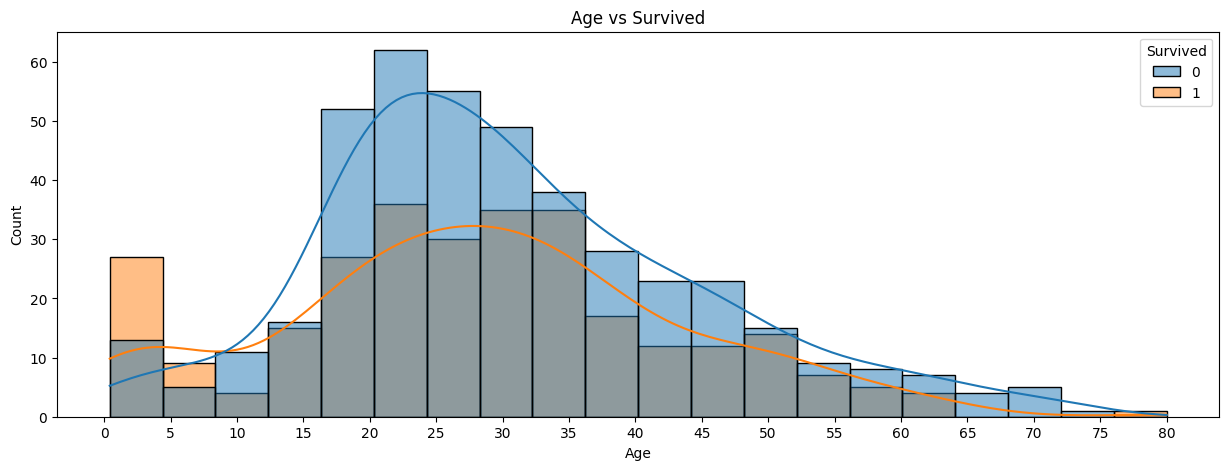

In [13]:
# histogram
plt.figure(figsize=(15,5))
sns.histplot(x="Age", hue="Survived", data=df_train, kde=True)
plt.title("Age vs Survived")
plt.xticks(list(range(0,81,5)))
plt.show()

$\textbf{Observations}$

* We can easily observe that most of the passengers were between 20 to 35.

* We can observe that age from 0-10 are highly Survived when compared with Not Survived. Specially for small children.

* Conversely, we can observe that age from 11 to 65 are comparatively less Survived.

$\textbf{Insights}$

* Perhaps we can do Feature Engineering to create a new age-related variable, by splitting age into different categories.

#### 5.5  Visualizing - Siblings (SibSp) Feature  

Here the numbers show how many spouse and siblings the passenger is travelling with.

In [14]:
z = df_train["SibSp"].value_counts().to_frame()
z

,SibSp
0,608
1,209
2,28
4,18
3,16
8,7
5,5


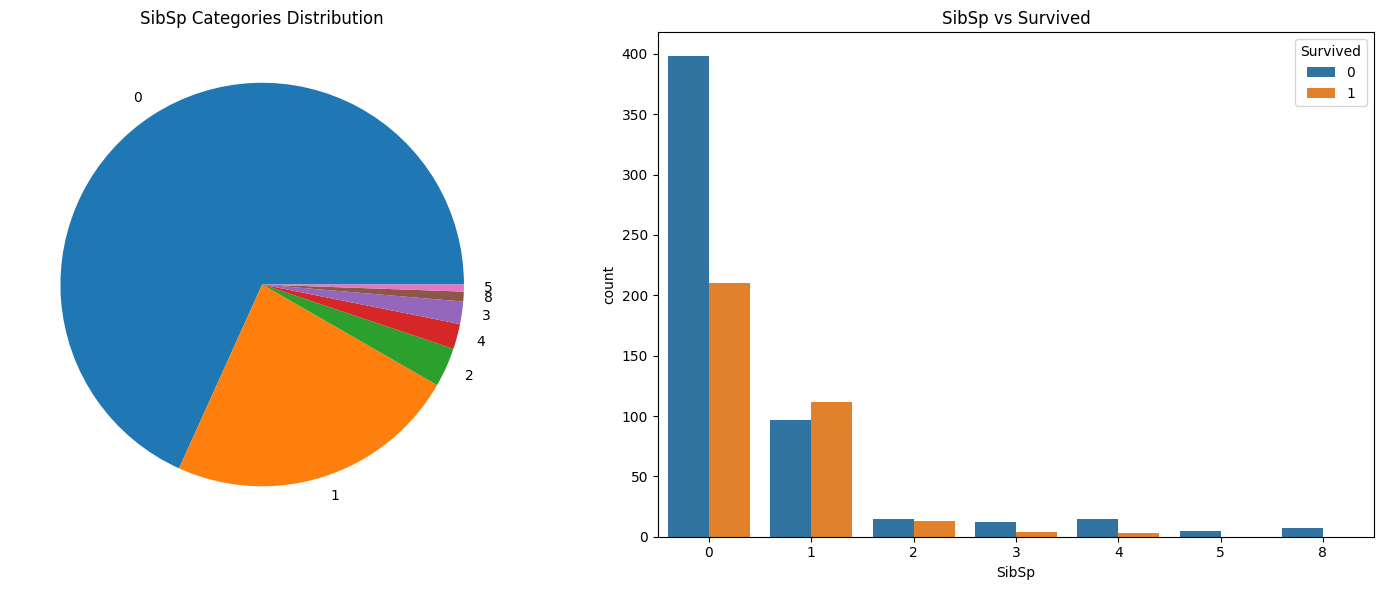

In [15]:
# figure size
plt.figure(figsize=(15,6))

# pie chart
plt.subplot(1,2,1)
plt.pie(z["SibSp"],labels=z.index.tolist())
plt.title("SibSp Categories Distribution")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="SibSp",hue="Survived",data=df_train)
plt.title("SibSp vs Survived")

# plot
plt.tight_layout()
plt.show()

$\textbf{Observations}$

* From piechart we can observe that most of the passenger are travelling without any sibling or spouse.

* And from coutplot we can infere some inverse relationship between rate of survival and having siblings.

$\textbf{Insights}$

* Once more, it will be possible to create a new feature to examine the significance in predicting survival of such information. Perhaps, we can create three categories, such as (1) No siblings, (2) 1-2 siblings and (3) more than 2 siblings. 

#### 5.6  Visualizing - Parch Feature

Here the Parch numbers are showing with how many $\textbf{parents}$ or $\textbf{childs}$ the passengers are travelling with.

In [16]:
z = df_train["Parch"].value_counts().to_frame()
z

,Parch
0,678
1,118
2,80
3,5
5,5
4,4
6,1


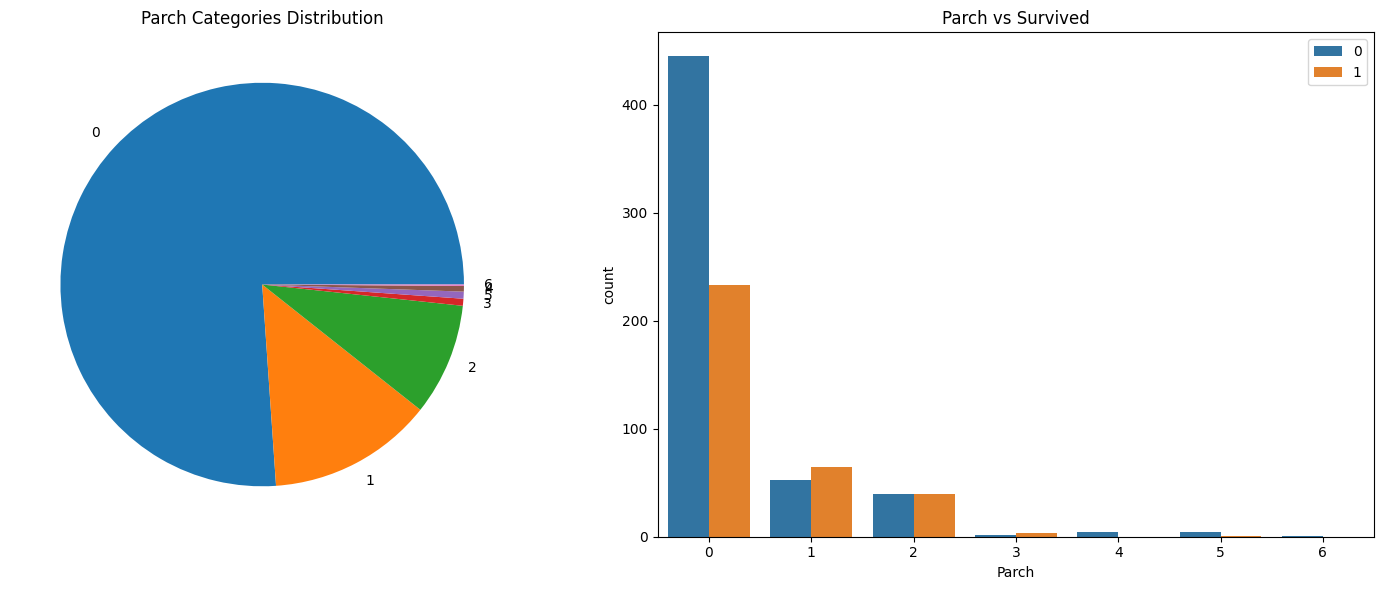

In [17]:
# figure size
plt.figure(figsize=(15,6))

# pie chat
plt.subplot(1,2,1)
plt.pie(z["Parch"],labels=z.index.tolist())
plt.title("Parch Categories Distribution")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="Parch",hue="Survived",data=df_train)
plt.title("Parch vs Survived")
plt.legend(loc="upper right")

# plot
plt.tight_layout()
plt.show()

$\textbf{Observations}$

* From pie-chart we can easily observe that almost 80% of passengers are travelling with their parents or childrens.
* From countplot we can observe following things
    * If the passengers is travelling with 0 parent/children than they have almost half chance of Survival
    * If the passengers is travelling with 1 or 2 parent/children than they have almost equal chane of Survival
    * We can't make any observation for passengers travelling with more than 2 parent/children because there are very few datapoints.

#### 5.7  Visualizing - Fare Feature

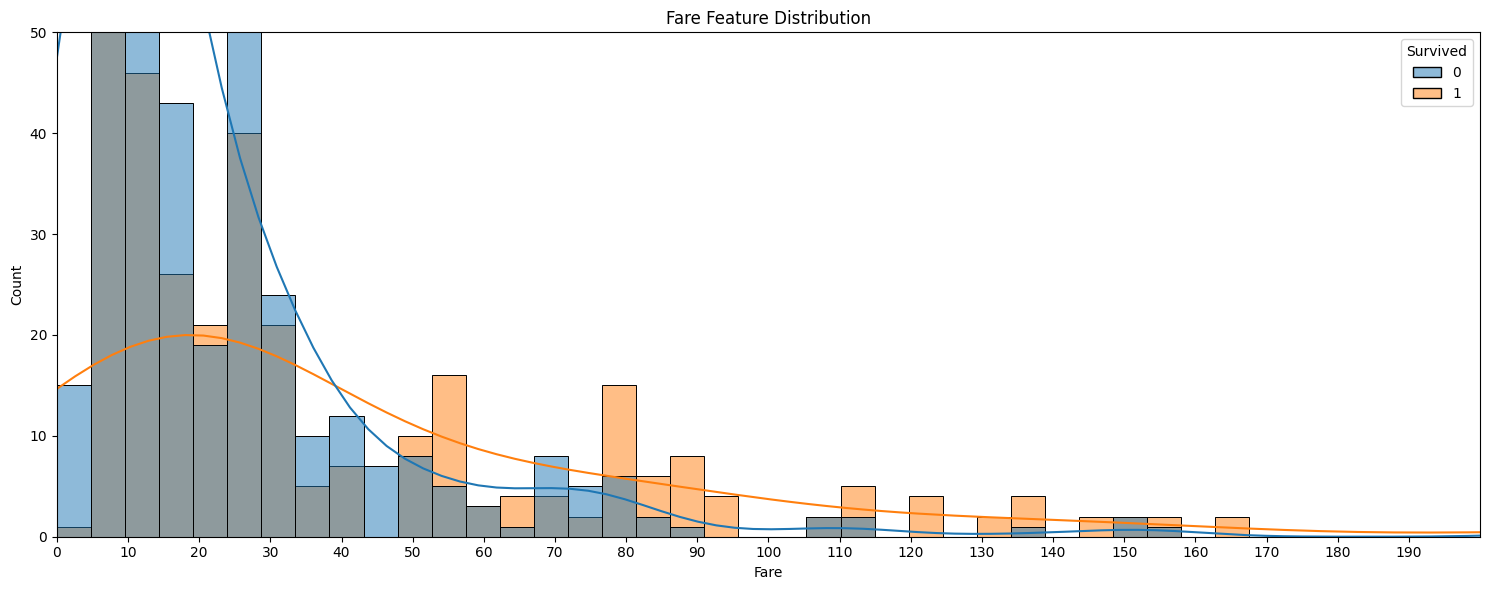

In [18]:
plt.figure(figsize=(15,6))
sns.histplot(x="Fare",hue="Survived",data=df_train,kde=True)
plt.title("Fare Feature Distribution")
plt.ylim(0,50)
plt.xlim(0,200)
plt.xticks(list(range(0,200,10)))
plt.tight_layout()
plt.show()

$\textbf{Observations}$

* Passengers having Fare charge between 0 to 5 are having almost negligible chance of Survival when compared with Non Survived.

$\textbf{Insights}$

* We can do Feature Engineering and can create a new feature Fare Range in which we can split fare into different categories.

#### 5.8  Visualizing - Embarked Feature


Recall there are three possible values for Embark: S for Southampton, C for Cherbourg, and Q for Queenstown (and NaN in case of missing value evidently)

In [19]:
z = df_train["Embarked"].value_counts().to_frame()
z

,Embarked
S,644
C,168
Q,77


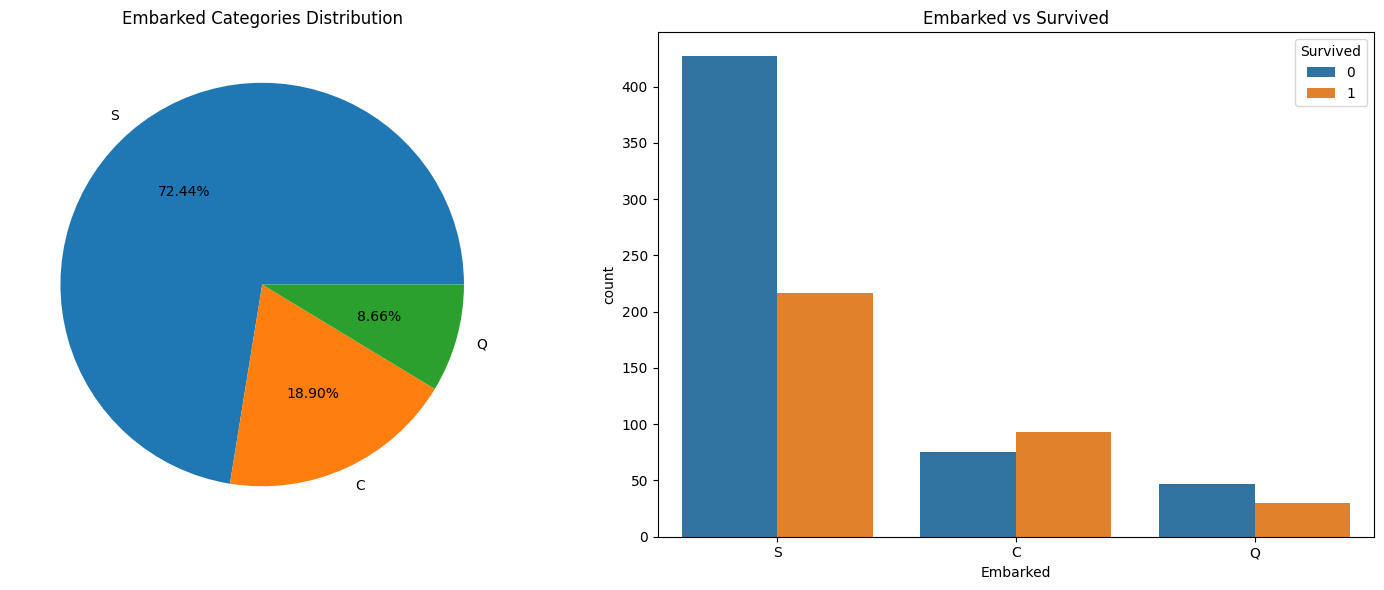

In [20]:
# figure size
plt.figure(figsize=(15,6))

# pie chart
plt.subplot(1,2,1)
plt.pie(z["Embarked"],labels=z.index.tolist(),autopct="%0.2f%%")
plt.title("Embarked Categories Distribution")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="Embarked",hue="Survived",data=df_train)
plt.title("Embarked vs Survived")

# plot
plt.tight_layout()
plt.show()

#### 5.9  Multivariate Analysis

Pair plot is used to understand the best set of features in order to explain a relationship between two variables or to form the most separated clusters.

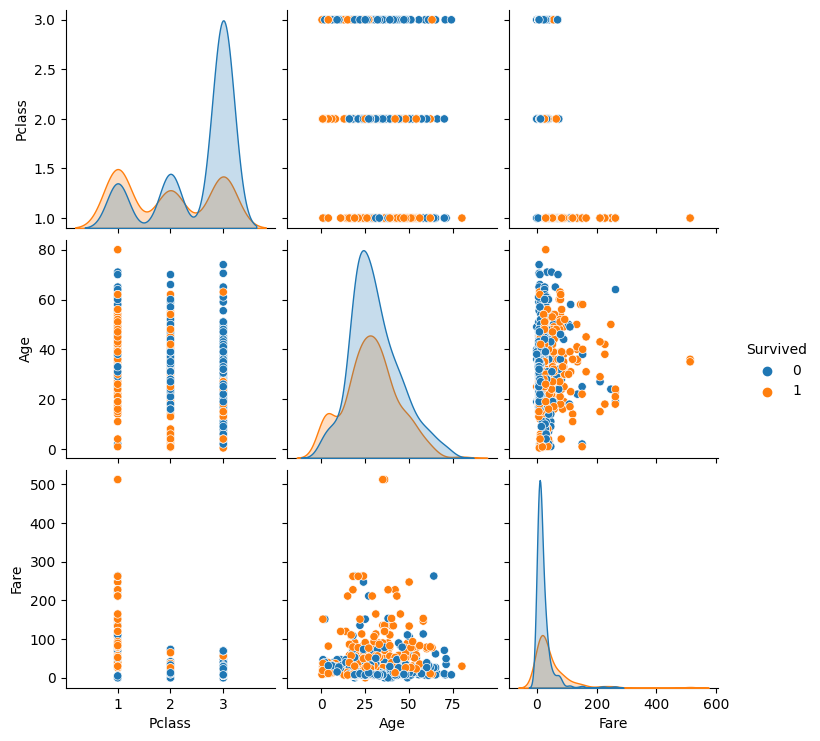

In [21]:
sns.pairplot(df_train.drop(columns=["PassengerId","SibSp","Parch"]),hue="Survived")
plt.show()

$\textbf{Observations}$

* We can observe that Age feature is having kind of normal distrbution.

* We can observe in Fare feature that it is having a right skewed distribution. It might be useful to fit the data into a logarithmic scale.


$\textbf{Note}$

* The distribution of Parch & SibSp were removed because they are have values as categories. By the way, later in this project, we are going to make a feature engineering process in these same variables and remove the orignal ones.



## 6.  Feature Engineering

#### 6.1.1  Creating new feature - *Family_Size*

As we know that SibSp stores the values indicating the number of siblings and spouse, and that Parch stores the values indicating number of parents or children the passanger is travelling with, we can crate a new feature named *family_size*, by adding all the values of SibSp & Parch.

In [22]:
df_train[["Name","SibSp","Parch"]].head()

,Name,SibSp,Parch
0,"Braund, Mr. Owen Harris",1,0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0
2,"Heikkinen, Miss. Laina",0,0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0
4,"Allen, Mr. William Henry",0,0


In [23]:
df_train["Family_Size"] = df_train["SibSp"] + df_train["Parch"] 
df_test["Family_Size"] = df_test["SibSp"] + df_test["Parch"]

#### 6.1.2  Visualizing - *Familiy_Size*

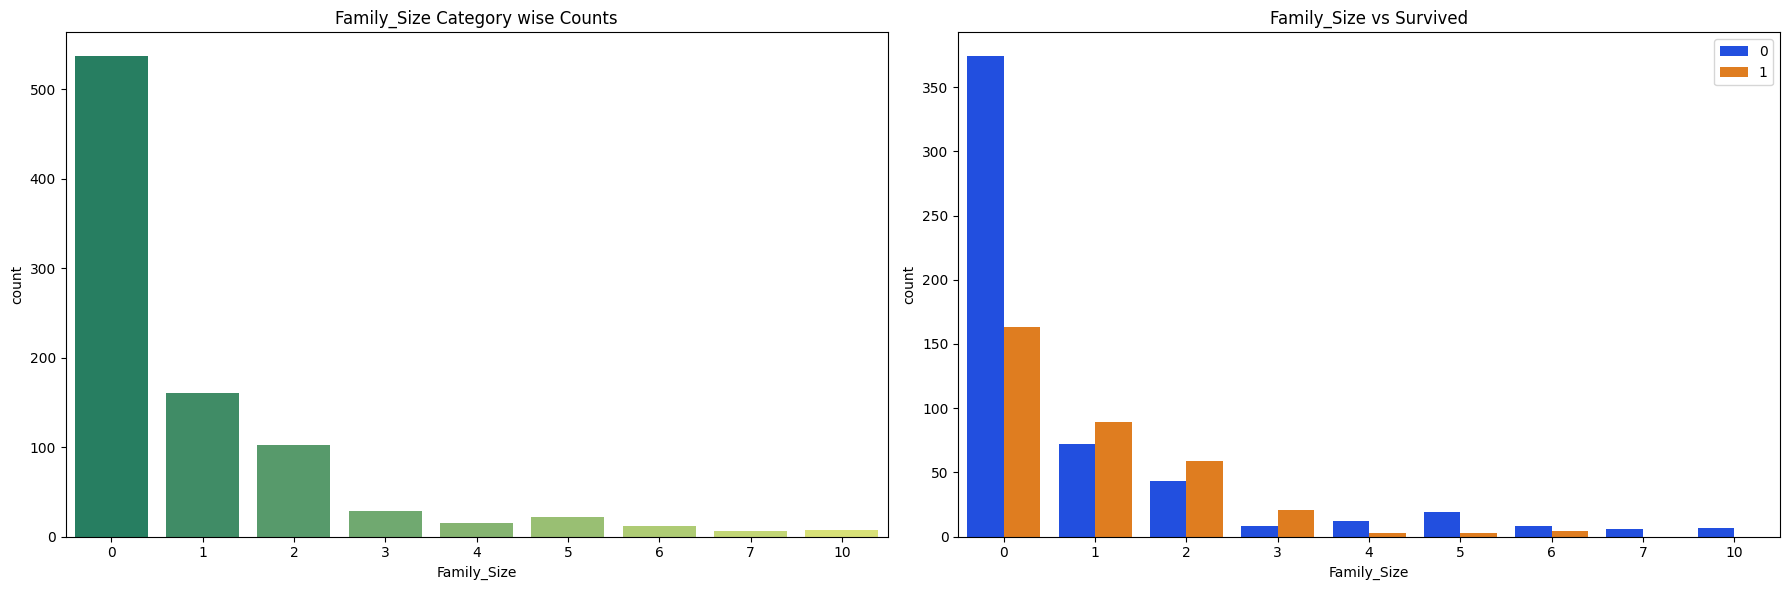

In [24]:
# figure size
plt.figure(figsize=(18,6))

# left count plot
plt.subplot(1,2,1)
sns.countplot(x="Family_Size",data=df_train,palette="summer")
plt.title("Family_Size Category wise Counts")

# right count plot
plt.subplot(1,2,2)
sns.countplot(x="Family_Size",hue="Survived",data=df_train,palette="bright")
plt.title("Family_Size vs Survived")


plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


* From the left graph we can observe that most of the passengers are travelling alone and the range of family members vary up to 11 (including the person in itself).

* The right one emerges some patterns that might be useful to the unsupervised predictor algorithm.



#### 6.2.1  Creating new feature - *Age_Category*

Recall the Age visualization earlier on this notebook.

In [25]:
# Removing NaN
df_train["Age"].fillna(0,inplace = True)
df_test["Age"].fillna(0,inplace = True)

# Partioning Data and Replacing NaN
df_train["Age_Category"] = pd.cut(df_train["Age"], bins=[-0.1,0.1,12,20,50,100], labels=["Unspecified","Children","Teenager","Adult","Elderly"])
df_test["Age_Category"] = pd.cut(df_test["Age"], bins=[-0.1,0.1,12,20,50,100], labels=["Unspecified","Children","Teenager","Adult","Elderly"])

#### 6.2.2  Visualizing - *Age_Category*

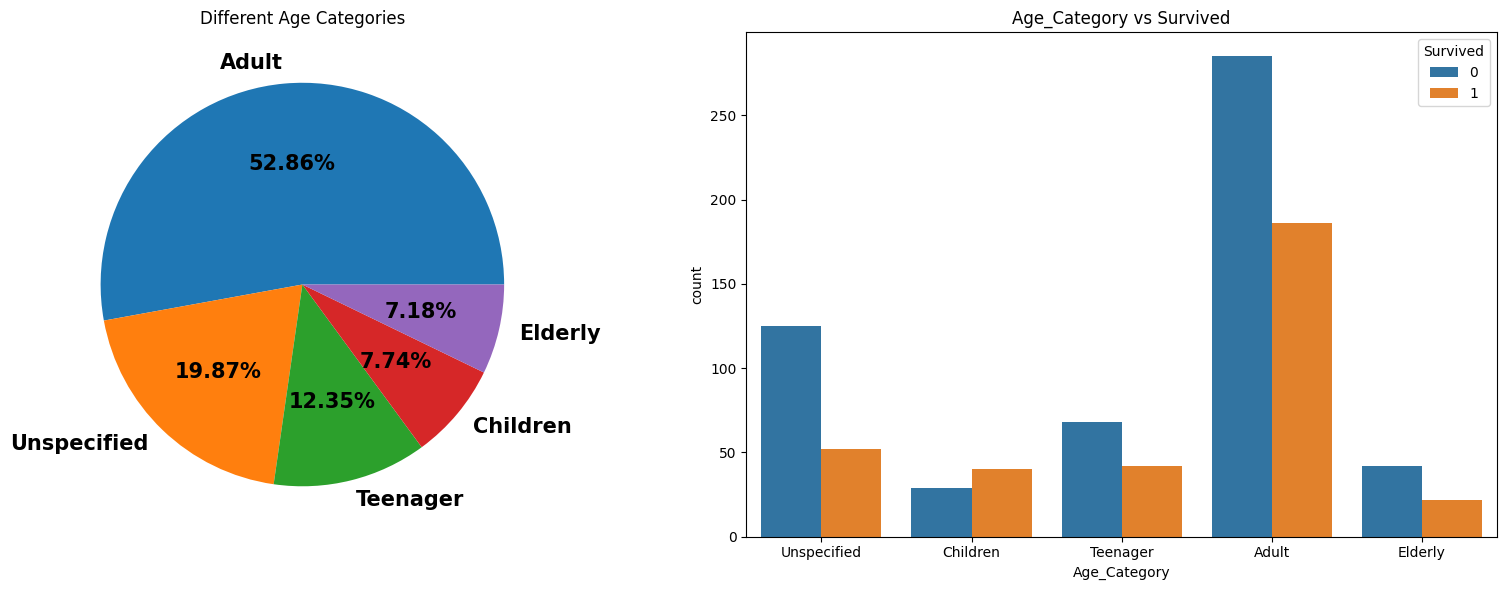

In [26]:
# figure size
plt.figure(figsize=(16,6))

# pie chart
plt.subplot(1,2,1)
z = df_train["Age_Category"].value_counts().to_frame()
plt.pie(z["Age_Category"], labels=z.index, autopct="%0.2f%%",textprops={"fontweight":"black","size":15})
plt.title("Different Age Categories")

# count plot
plt.subplot(1,2,2)
sns.countplot(x="Age_Category",hue="Survived",data=df_train)
plt.title("Age_Category vs Survived")

# plot
plt.tight_layout()
plt.show()

$\textbf{Observations}$

* It is clear that being a children gives you better chances of survival. Conversely, being an adult does the very opposite.



#### 6.3.1  Descriptive analysis on *Fare* feature

In [27]:
np.isnan(df_train["Fare"]).sum()

0

In [28]:
# NaN to zero
df_test["Fare"].fillna(0,inplace=True)
df_train["Fare"].agg(["min","median","mean","std","var","max"]).to_frame().T

,min,median,mean,std,var,max
Fare,0.0,14.4542,32.204208,49.693429,2469.436846,512.3292


#### 6.3.2  Creating new feature - *Fare_Range*

In [29]:
def fare_range(df):
    fare = list()
    for i in df["Fare"]:
        if (i>0 and i<=7):
            fare.append("Low Fare")
        elif (i>=7 and i<=14.45):
            fare.append("Medium Fare")
        elif (i>14.45 and i<=32.20):
            fare.append("Average Fare")
        elif (i>32.20):
            fare.append("High Fare")
        else:
            fare.append("Unspecified")    # Because of 0 value present in test dataset
    df["Fare_Range"] = fare

In [30]:
fare_range(df_train)
fare_range(df_test)

#### 6.3.3  Visualizing - *Fare_Range*

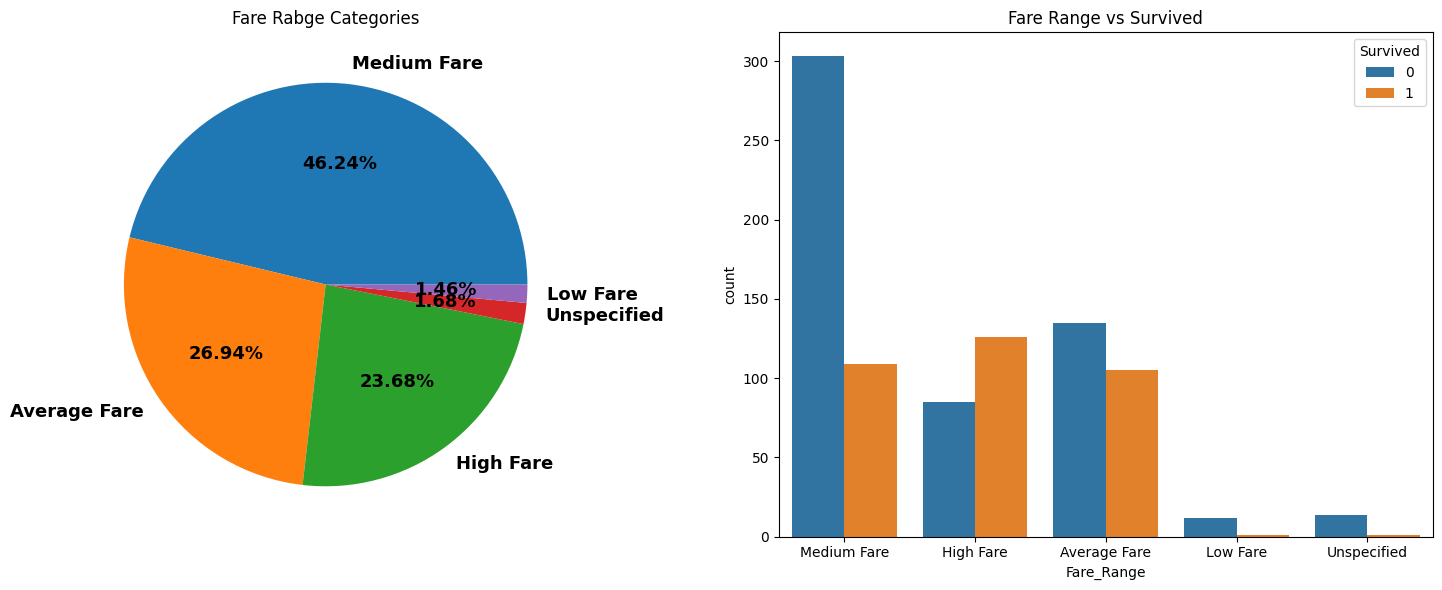

In [31]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
z = df_train["Fare_Range"].value_counts().to_frame()
plt.pie(z["Fare_Range"], labels=z.index, autopct="%0.2f%%",textprops={"fontweight":"black","size":13})
plt.title("Fare Rabge Categories")

plt.subplot(1,2,2)
sns.countplot(x="Fare_Range",hue="Survived",data=df_train)
plt.title("Fare Range vs Survived")
plt.tight_layout()
plt.show()

## 7.  Data Pre-Processing

#### 7.1  Checking duplicates

In [32]:
print(f"Duplicate in Training Data is:{df_train.duplicated().sum()},({100*df_train.duplicated().sum()/len(df_train)}%)")
print(f"Duplicate in Testing Data is:{df_test.duplicated().sum()},({100*df_test.duplicated().sum()/len(df_test)}%)")

Duplicate in Training Data is:0,(0.0%)
Duplicate in Testing Data is:0,(0.0%)


#### 7.2  Checking missings values and their percentages

In [33]:
# df_train
z = df_train.isnull().sum()[df_train.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
z["% of Missing values"] = round(z["Number of Missing Values"]*100/len(df_train),2)
z

,Number of Missing Values,% of Missing values
Cabin,687,77.10
Embarked,2,0.22


In [34]:
# df_test
z = df_test.isnull().sum()[df_test.isnull().sum()>0].to_frame().rename(columns={0:"Number of Missing Values"})
z["% of Missing values"] = round(z["Number of Missing Values"]*100/len(df_test),2)
z

,Number of Missing Values,% of Missing values
Cabin,327,78.23


#### 7.3  Visualizing missing values

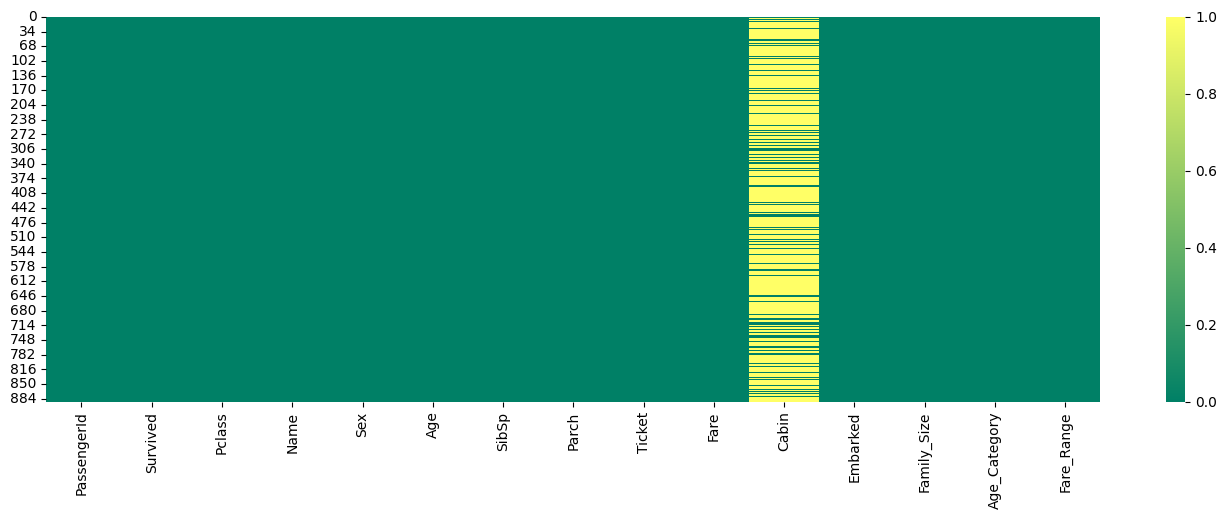

In [35]:
# df_train
plt.figure(figsize=(17,5))
sns.heatmap(df_train.isnull(),cmap="summer")
plt.show()

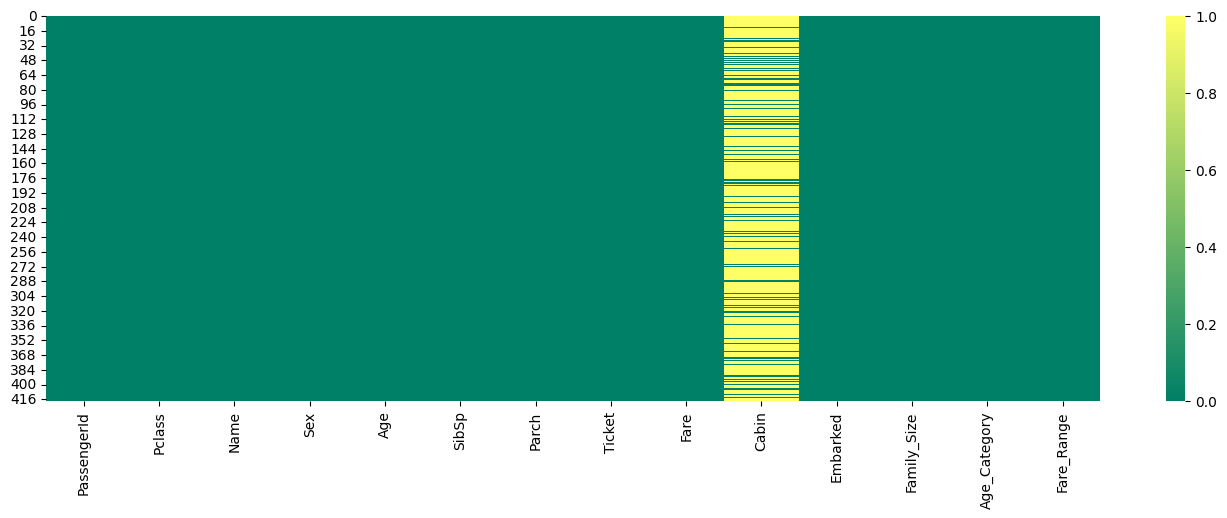

In [36]:
# df_test
plt.figure(figsize=(17,5))
sns.heatmap(df_test.isnull(),cmap="summer")
plt.show()

$\textbf{Observations}$


* We are going to drop the two lines which holds NaN for Embarked.

* Finally, we can see both from the table and from the chart, the *Cabin* feature lacks 77% of data, making it unfeasible to be used. Therefore, we are going to eliminate it.

#### 7.4  Drop Columns

In [37]:
# columns to be removed
cols = ["PassengerId","Name","Ticket","Cabin"]

# it holds the PassengerId information from df_test
passengerId = list(df_test["PassengerId"])

# drop columns
df_train.drop(columns=cols,inplace=True)
df_test.drop(columns=cols,inplace=True)

#### 7.5  Repair - *Embarked* feature

In [38]:
df_train["Embarked"].fillna("S",inplace=True)

#### 7.6  Visualizing and applying log transformation on *Fare* feature

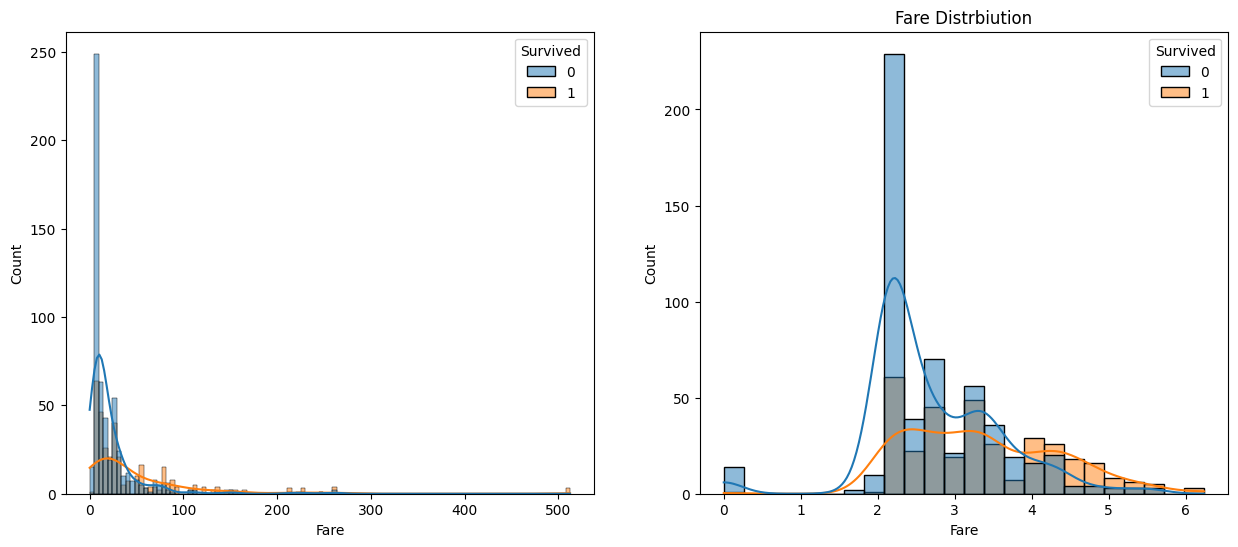

In [39]:
# figure size
plt.figure(figsize=(15,6))

# before
plt.subplot(1,2,1)
sns.histplot(x="Fare",hue="Survived",kde=True,data=df_train)

# Applying transformation
df_train["Fare"] = np.log(1+df_train["Fare"])
df_test["Fare"]=np.log(1+df_test["Fare"])

# after
plt.subplot(1,2,2)
sns.histplot(x="Fare",hue="Survived",kde=True,data=df_train)

# plot
plt.title("Fare Distrbiution")
plt.show()

#### 7.7  Feature Enconding

In [40]:
nominal_cols = ["Pclass","Sex","Age_Category","Fare_Range","Embarked"]

df_train = pd.get_dummies(columns=nominal_cols, data=df_train)
df_test = pd.get_dummies(columns=nominal_cols, data=df_test)

#### 7.8  Scaling data and selecting features

In [41]:
# scale data
scaler = StandardScaler()
X_train = scaler.fit_transform(df_train.drop(columns=["Survived"]))
y_train = df_train["Survived"]
X_test = scaler.fit_transform(df_test)

## 8.  Models Testing with Cross Validation

#### 8.1  Cross Validation Function

In [42]:
def cross_validation(model,X_train,y_train,cv=5):
    results = cross_validate(estimator=model,
                            X=X_train,
                            y=y_train,
                            cv=cv,
                            scoring=["accuracy"],
                            return_train_score=True)
        
    print(f"{model}")
    print(f"Training Accuracy scores = {results['train_accuracy']}")
    print(f"Mean Training Accuracy = {results['train_accuracy'].mean()*100}")
    print(f"Validation Accuracy scores = {results['test_accuracy']}")
    print(f"Mean Validation Accuracy = {results['test_accuracy'].mean()*100}")
    print("-"*100)
    return [results['train_accuracy'].mean()*100,results['test_accuracy'].mean()*100]

In [43]:
models = {"Logistic Regression":LogisticRegression(),   
          "K-Nearest Neighbours":KNeighborsClassifier(),
          "Support Vector Machine":SVC(),
          "Decision Tree":DecisionTreeClassifier()}
df_results = pd.DataFrame(columns= list(models.values()))
df_results["Models"] = list(models.values())

for enum,model in enumerate(list(models.values())):
    df_results.loc[enum,["Mean Training Accuracy","Mean Validation Accuracy"]] = cross_validation(model,X_train,y_train)

LogisticRegression()
Training Accuracy scores = [0.81741573 0.82047686 0.81065919 0.82187938 0.80084151]
Mean Training Accuracy = 81.42545345667145
Validation Accuracy scores = [0.79329609 0.78089888 0.79213483 0.79213483 0.8258427 ]
Mean Validation Accuracy = 79.68614650681063
----------------------------------------------------------------------------------------------------
KNeighborsClassifier()
Training Accuracy scores = [0.85814607 0.87096774 0.85273492 0.85974755 0.85273492]
Mean Training Accuracy = 85.88662401311124
Validation Accuracy scores = [0.77094972 0.80898876 0.83146067 0.8258427  0.82022472]
Mean Validation Accuracy = 81.1493314920595
----------------------------------------------------------------------------------------------------
SVC()
Training Accuracy scores = [0.85393258 0.8569425  0.83730715 0.84992987 0.8457223 ]
Mean Training Accuracy = 84.8766881510314
Validation Accuracy scores = [0.82122905 0.80337079 0.82022472 0.79775281 0.84269663]
Mean Validation Accur

## 9.  Models Performance Comparison

#### 9.1  Visualizing - Cross Validation Comparison

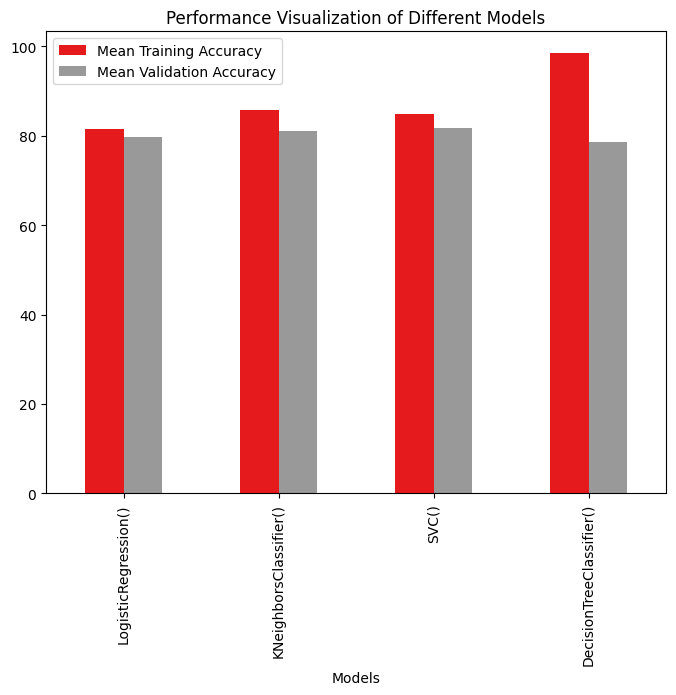

In [44]:
df_results.plot(x="Models",y=["Mean Training Accuracy","Mean Validation Accuracy"], figsize=(8,6),kind="bar",
        title="Performance Visualization of Different Models",colormap="Set1")
plt.show()

$\textbf{Observations}$

* It is normal that Training Accuracy is systematically above the Validation Accuracy, once training data is something which the model is already familiar with.

* Because of the consistence in the results, specially regarding the Validation Accuracy, we choose the Support Vector Machine to predict the survival rate of the others passengers on board.

## 10.  Final Results

#### 10.1  Model Prediction Function

In [45]:
def model_prediction(model,X_test,X_train,y_train):
    model.fit(X_train ,y_train)
    y_hat = model.predict(X_test)
    return y_hat

In [46]:
model = SVC()
y_hat = model_prediction(model,X_test,X_train,y_train)
y_hat

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

## 11.  Submission

In [47]:
df_titanic_survival_prediction = pd.DataFrame({"PassengerId":passengerId,
                                            "Survived":y_hat})
df_titanic_survival_prediction.to_csv("titanic_survival_prediction.csv",index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f062523-7425-4cba-9cee-53a7fd40ef88' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>